# Non-PV work
### Neshyba, 2021

## Learning Goals
1. Write the "forces" associated with electrical and concentration non-PV work.
1. Explain how to numerically integrate those forces to obtain values of the work for given paths. 
1. Describe methods for probing the path dependence of non-PV work.
1. Gain experience transforming integrals into path-independent form.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import pint
from pint import UnitRegistry
ureg = UnitRegistry()
AssignQuantity = ureg.Quantity

In [2]:
%matplotlib notebook

In [3]:
R = AssignQuantity(8.314, 'J/mol/K')
T = AssignQuantity(310,'K') # Physiological temperature

### Moving $H^+$ ions up an electrical potential
Suppose you move five $H^+$ ions up an electrical potential of 0.1 Volts. What's the work done? Express your answer in Joules.

In [4]:
### BEGIN SOLUTION
Q = AssignQuantity(1.6e-19,'C')
deltaphi = AssignQuantity(0.1,'V')
work = 5*Q*deltaphi
print(work)
work.ito('J')
print(work)
### END SOLUTION

8.000000000000001e-20 coulomb * volt
8.000000000000001e-20 joule


### Moving a mole of $H^+$ ions up an electrical potential
Suppose the electrical potential of an intermembrane space is 0.17 V greater than that of the matrix, separated by a membrane. Find the electrical work ($w’$) (not the concentration work) required to move one mole of $H^+(aq)$ from the matrix and into the intermembrane space. Express your answer in kJ.

In [5]:
### BEGIN SOLUTION
n = AssignQuantity(1,'mol')
F = AssignQuantity(9.65e4,'C/mol')
deltaphi = AssignQuantity(0.17,'V')
work = n*F*deltaphi
print(work)
work.ito('kJ')
print(work)
### END SOLUTION

16405.0 coulomb * volt
16.405 kilojoule


### Work against a concentration gradient, Part 1: Linear gradient
Our theory says that the work done in moving $n$ moles of solute up a concentration gradient parameterized by $c(\epsilon)$ is given by

$$
w' = \int_0^1 n R T {1 \over c} {dc \over d \epsilon} d\epsilon \ \ \ \ (1)
$$

Suppose a cell transports a mole of $H^+$ ions at $pH$ of $8$ across a membrane into a region having a $pH$ of $7$. Assume, furthermore, that the path these $H^+$ ions take is a linear function of $\epsilon$, i.e.,

$$
c(\epsilon)= c_1+\epsilon*(c_2-c_1)  \ \ \ \  (2)
$$

Your task: using numpy's trapz function as an approximation to Eq. (1), find the work done at physiological temperature.

<IPython.core.display.Javascript object>


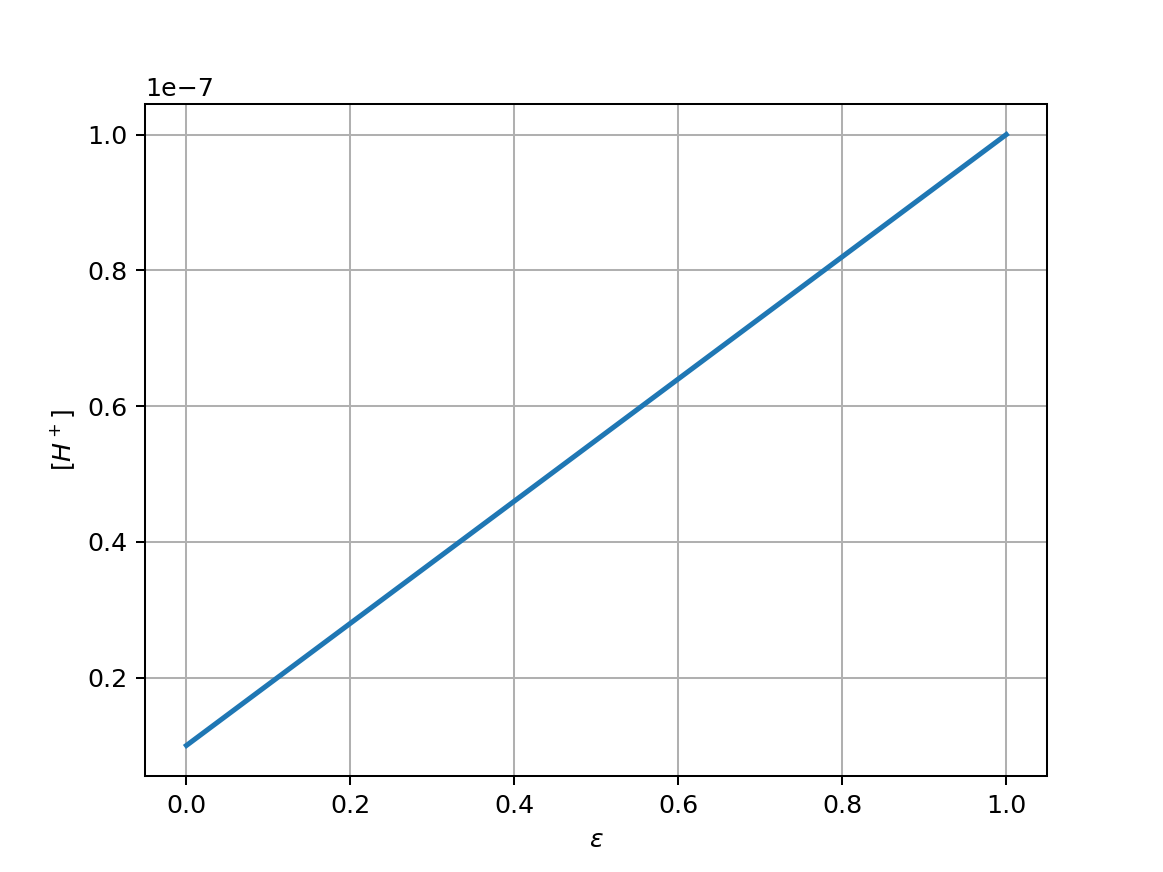

Reversible work for path 2 is 5934.56192100825 joule / mole
J/mol


In [6]:
# Here we'll use np.linspace to lay out a variable, "eps", that runs from zero to one.
# We'll use 1000 points for more accuracy in the numerical integration later
eps = np.linspace(0,1,1000)

# Specify the starting and ending concentrations (c1 and c2) of H+ based on the pH
### BEGIN SOLUTION
pH1 = 8; c1 = 10**(-pH1)
pH2 = 7; c2 = 10**(-pH2)
### END SOLUTION

# Define the concentration as a simple linear path from c1 to c2 (see Eq. (1) above), 
# and graph the concentration as a function of eps
### BEGIN SOLUTION
c = c1 + eps*(c2-c1)
plt.figure()
plt.plot(eps,c,linewidth=2)
plt.xlabel(r'$\varepsilon $')
plt.ylabel('[$H^+$]')
plt.grid(True)
### END SOLUTION

# Calculate dc/deps
### BEGIN SOLUTION
dc_deps = c2-c1
### END SOLUTION

# Form the integrand (including dc/deps)
### BEGIN SOLUTION
integrand = R*T/c*dc_deps
### END SOLUTION

# Integrate and report the results using np.trapz 
# see https://numpy.org/doc/stable/reference/generated/numpy.trapz.html for a refresher on trapz
### BEGIN SOLUTION
w = np.trapz(integrand,eps)
print("Reversible work for path 2 is", w)

# Report the units of the result you just got
print('J/mol')

### END SOLUTION

### Pause for analysis
Unfortunately, np.trapz doesn't "do" units, so you'll have to answer this using your own dimensional analysis skills. In the cell below, state the units of the result you just got, and explain how you came to that conclusion.

### Work against a concentration gradient, Part 2: Non-linear gradient
This is like the previous problem, but we're assuming the concentration of $H^+$ rises as a *nonlinear* function of $\epsilon$. This can be any function you like, it just has to satisfy the boundary conditions, namely that $c(\epsilon=0)=10^{-8}$, and $c(\epsilon=1)=10^{-7}$. Here's one possibility:

$$
c(\epsilon)= c_1+\epsilon^2*(c_2-c_1) \ \ \ \ (3)
$$

Your task: using numpy's trapz function as an approximation to Eq. (1), find the work done at physiological temperature. Don't forget that $\dfrac {dc}{d\varepsilon}$ will have to be modified too.  

<IPython.core.display.Javascript object>


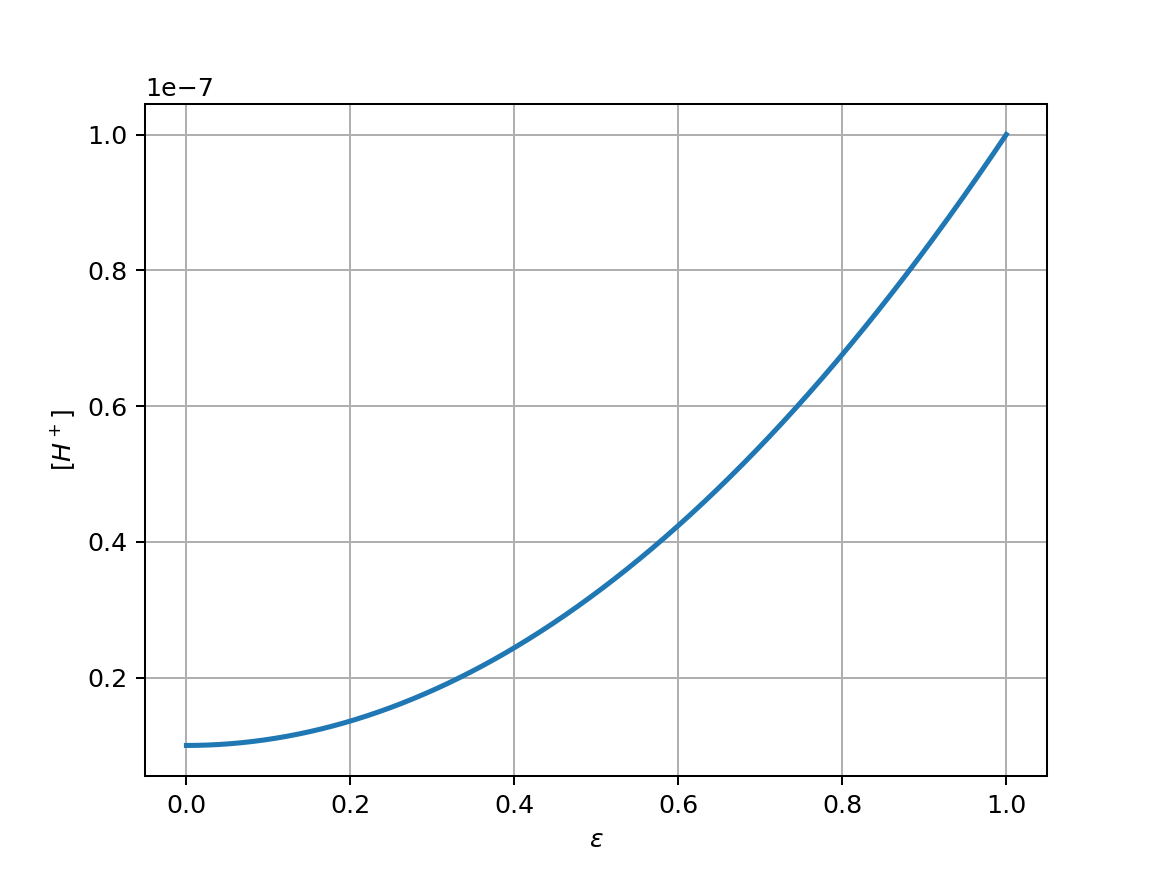

Reversible work for path 2 is 5934.540479919866 joule / mole
J/mol


In [7]:
# Again, we'll use np.linspace to lay out a variable, "eps", that runs from zero to one, 1000 points
eps = np.linspace(0,1,1000)

### BEGIN SOLUTION
# Specify the starting and ending concentrations
pH1 = 8; c1 = 10**(-pH1)
pH2 = 7; c2 = 10**(-pH2)

# Define the concentration as a nonlinear path from c1 to c2 (e.g. Eq. (2) above, or your own), and graph it
c = c1 + eps**2*(c2-c1)
plt.figure()
plt.plot(eps,c,linewidth=2)
plt.xlabel(r'$\varepsilon $')
plt.ylabel('[$H^+$]')
plt.grid(True)

# Calculate dc/deps
dc_deps = 2*eps*(c2-c1)

# Form the integrand (including dc/deps)
integrand = R*T/c*dc_deps

# Integrate using trapz and report the results
w = np.trapz(integrand,eps)
print("Reversible work for path 2 is", w)

# Report the units of the result you just got
print('J/mol')

### END SOLUTION

### Pause for analysis
How well do the two paths agree in terms of the work done? How many significant figures do they agree? What does this tell you about the possible existence of a state function whose changes are given by  $w'$?

### Work against a concentration gradient, Part 3: Analytical solution
As a last step, let's compare the results of your numerical integration (using np.trapz) to analytical results. An easy way to do the latter is to note that we can carry out a change-of-variables transformation of the integral appearing in Eq. (1). 

Your task: solve this integral analytically (using pen and paper), then use it in the cell below to evaluate the work done. 

In [8]:
### BEGIN SOLUTION

w_analytical = n*R*T*np.log(c2/c1)
print(w_analytical)

# For next cell:
print(w)

### END SOLUTION

5934.544663577274 joule
5934.540479919866 joule / mole


### Pause for analysis
To how many significant figures do your analytical result agree with your numerical results? 